<div style="background-color: purple; padding: 10px;">
<span style="font-size: 24px; font-weight: bold; color: white;">Project 14 House Sales in King County Regression</span>
</div>


## About data:
### This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
###  Variables
#### ● id - Unique ID for each home sold
#### ● date - Date of the home sale
#### ● price - Price of each home sold
#### ● bedrooms - Number of bedroom
#### ● bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
#### ● sqft_living - Square footage of the apartments interior living space
#### ● sqft_lot - Square footage of the land space
#### ● floors - Number of floors
#### ● waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
#### ● view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
#### ● grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
#### ● sqft_above - The square footage of the interior housing space that is above ground level
#### ● sqft_basement - The square footage of the interior housing space that is below ground level
#### ● yr_built - The year the house was initially built
#### ● yr_renovated - The year of the house’s last renovation
#### ● zipcode - What zipcode area the house is in
#### ● lat - Lattitude
#### ● long - Longitude
#### ● sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#### ● sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


## Procedure
#### 1. Import Data
#### 2. Check dataset size
#### 3. Find and treat missing values (If any)
#### 4. Check column types and describe which columns are numerical, or categorical
#### 5. Perform Univariate analysis
#### i. Calculate mean, median, std dev, and quartiles of numerical data
#### ii. Plot histogram for a few categorical variables
#### iii. Check the distribution of numerical variables and comment on it
#### 6. Perform Bivariate analysis
#### i. Plot pair plots
#### ii. Perform a Chi-square analysis to check whether there is a relationship between
#### ● view and waterfront
#### ● condition and grade
#### iii. Calculate Pearson correlation, and plot their heatmap
#### 7. Drop any unnecessary columns
#### 8. One hot encode categorical variables (if any)
#### 9. Split into train and test set
#### 10. Scale the variables
#### 11. Train multiple models like Linear regression, Decision Tree, Random Forest, SVR, etc.
#### 12. Check their performance, and comment on which is the best model
#### 13. Check whether Linear regression performance is good or not
#### 14. Check for Multi-collinearity (Hint: Use VIF)
#### 15. Remove columns with high multi-collinearity (If any)
#### 16. Re-run all the models and check the performance

## Compulsory
### Use grid search CV to tune the hyperparameter of the best model
### Train a polynomial regression model with degree 2, and 3 and compare its performance with other models 



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

##  1. Import Data

In [8]:
df= pd.read_csv('D:/Downloads/kc_house_data.csv')

In [9]:
pd.set_option("display.max_column",None)

In [10]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 2. Check dataset size

In [80]:
df.shape

(21597, 18)

## 3. Find and treat missing values (If any)

In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## 4. Check column types and describe which columns are numerical, or categorical

In [14]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [15]:
# [date,bathrooms,floors,grade]

In [16]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [17]:
df. grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [18]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),'\n',sep='\n')

id
[   1000102    1200019    1200021 ... 9842300540 9895000040 9900000190]


date
['20140502T000000' '20140503T000000' '20140504T000000' '20140505T000000'
 '20140506T000000' '20140507T000000' '20140508T000000' '20140509T000000'
 '20140510T000000' '20140511T000000' '20140512T000000' '20140513T000000'
 '20140514T000000' '20140515T000000' '20140516T000000' '20140517T000000'
 '20140518T000000' '20140519T000000' '20140520T000000' '20140521T000000'
 '20140522T000000' '20140523T000000' '20140524T000000' '20140525T000000'
 '20140526T000000' '20140527T000000' '20140528T000000' '20140529T000000'
 '20140530T000000' '20140531T000000' '20140601T000000' '20140602T000000'
 '20140603T000000' '20140604T000000' '20140605T000000' '20140606T000000'
 '20140607T000000' '20140608T000000' '20140609T000000' '20140610T000000'
 '20140611T000000' '20140612T000000' '20140613T000000' '20140614T000000'
 '20140615T000000' '20140616T000000' '20140617T000000' '20140618T000000'
 '20140619T000000' '20140620T000000' '2014

In [19]:
#Changing data type of Date column
df['date'] = pd.to_datetime(df['date'], format='ISO8601').dt.date

ValueError: time data '20141013T000000' does not match format 'ISO8601' (match)

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [25]:
# # Extract year, month, and day from the date column
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day
# df['day_of_week'] = df['date'].dt.dayofweek


In [26]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [27]:
df['floors'] = df['floors'].round().astype(int)# we should replace with floor

In [28]:
df['floors'].value_counts()

1    10680
2    10312
3      613
4        8
Name: floors, dtype: int64

In [29]:

df['grade_category']= pd.cut(df['grade'], bins=[0, 3, 7, "inf"], labels=['Short of Building Construction and Design', 'Average Level of Construction and Design', 'High Quality Level of Construction and Design'], right=False)

In [30]:
# df['grade_category'] = np.where(df['grade'] <= 3, 'Short of Building Construction and Design',
#                                 np.where(df['grade'] <= 7, 'Average Level of Construction and Design',
#                                          'High Quality Level of Construction and Design'))


In [31]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [32]:
df['grade_category'].value_counts()

High Quality Level of Construction and Design    17664
Average Level of Construction and Design          2312
Short of Building Construction and Design         1637
Name: grade_category, dtype: int64

In [33]:
df[df["bedrooms"]==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_category
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,4,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,High Quality Level of Construction and Design
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,High Quality Level of Construction and Design
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,High Quality Level of Construction and Design
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000,Average Level of Construction and Design
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,Short of Building Construction and Design
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,High Quality Level of Construction and Design
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,High Quality Level of Construction and Design
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,High Quality Level of Construction and Design
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,High Quality Level of Construction and Design
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,High Quality Level of Construction and Design


In [34]:
df.drop(df[df["bedrooms"] == 0].index, inplace=True)

In [35]:
df[df["bathrooms"]==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_category
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,Average Level of Construction and Design
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549,Average Level of Construction and Design
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290,High Quality Level of Construction and Design


In [36]:
df.drop(df[df["bathrooms"] == 0].index, inplace=True)

In [37]:
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                     int32
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
grade_category          category
dtype: object

### - Feature engineering

In [38]:
current_year = datetime.now().year
df['age_of_property'] = current_year - df['yr_built']

In [39]:
df.drop("id",inplace=True,axis=1)

In [40]:
df.reset_index(drop=True, inplace=True)


In [41]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_category,age_of_property
0,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,High Quality Level of Construction and Design,68
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,High Quality Level of Construction and Design,72
2,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Average Level of Construction and Design,90
3,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,High Quality Level of Construction and Design,58
4,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,High Quality Level of Construction and Design,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,High Quality Level of Construction and Design,14
21593,2015-02-23,400000.0,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,High Quality Level of Construction and Design,9
21594,2014-06-23,402101.0,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,High Quality Level of Construction and Design,14
21595,2015-01-16,400000.0,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,High Quality Level of Construction and Design,19


## 5. Perform Univariate analysis


### i. Calculate mean, median, std dev, and quartiles of numerical data

In [42]:
pd.set_option('display.float_format', '{:.2f}'.format)  # converting the scientific notation to the normal notation

In [43]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_of_property
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540202.92,3.37,2.12,2080.32,15099.41,1.53,0.01,0.23,3.41,7.66,1788.60,291.73,1971.00,84.46,98077.95,47.56,-122.21,1986.62,12758.28,52.00
std,367133.73,0.93,0.77,918.11,41412.64,0.55,0.09,0.77,0.65,1.17,827.76,442.67,29.38,401.82,53.51,0.14,0.14,685.23,27274.44,29.38
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,8.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,26.00
50%,450000.00,3.00,2.25,1910.00,7618.00,2.00,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,48.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,72.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,4.00,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,123.00


### ii. Plot histogram for a few categorical variables


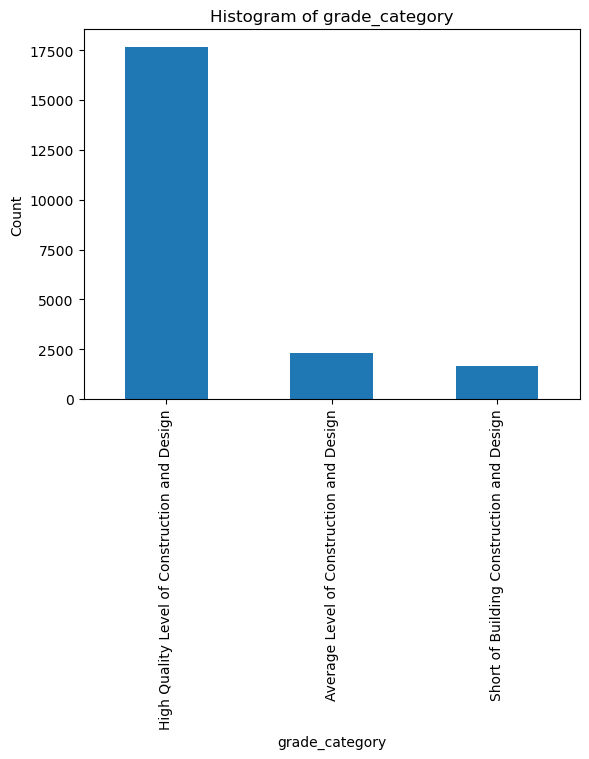

In [44]:

cat = ['grade_category']

for i in cat:
    df[i].value_counts().plot.bar()
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()


### iii. Check the distribution of numerical variables and comment on it

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


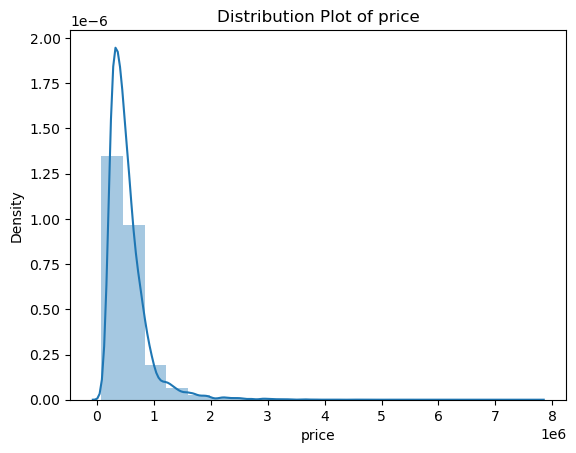

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


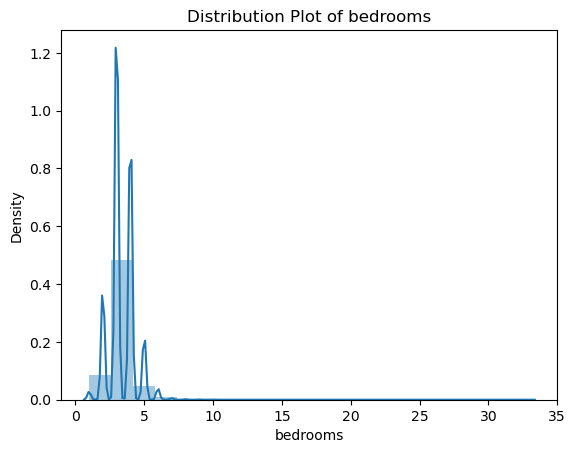

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


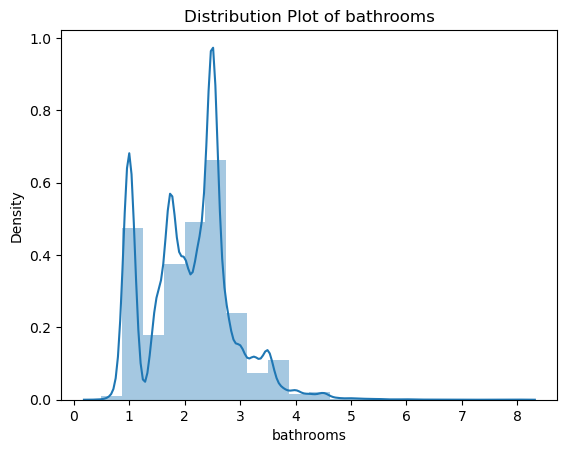

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


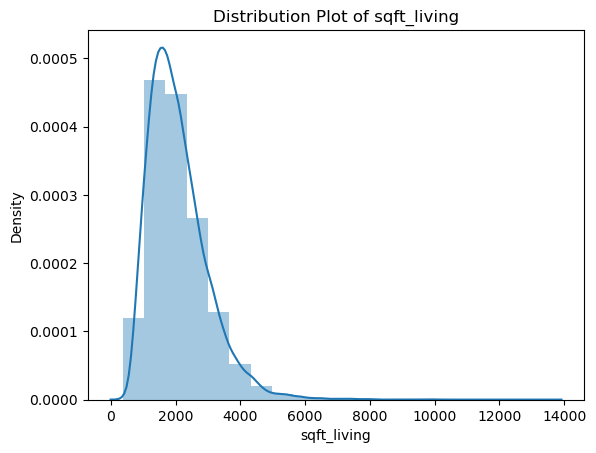

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


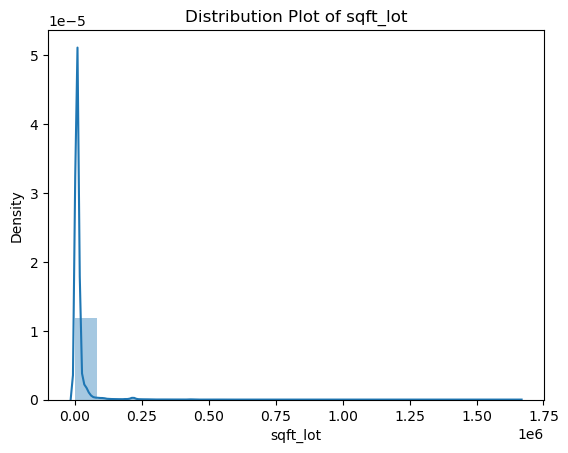

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


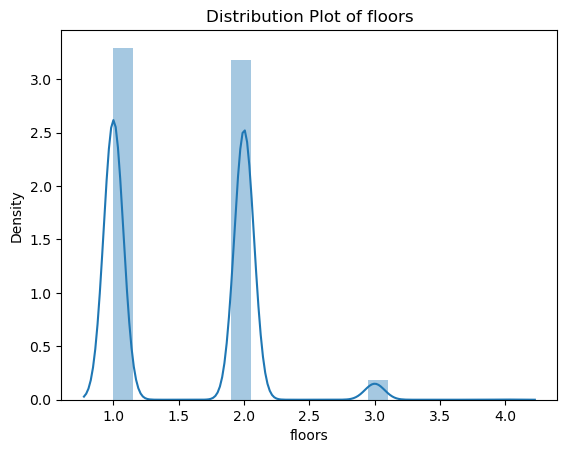

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


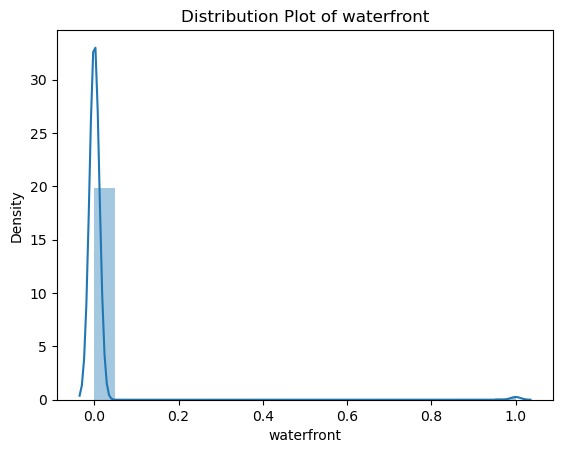

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


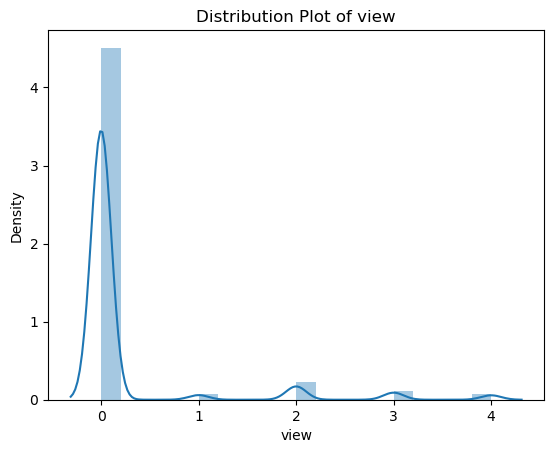

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


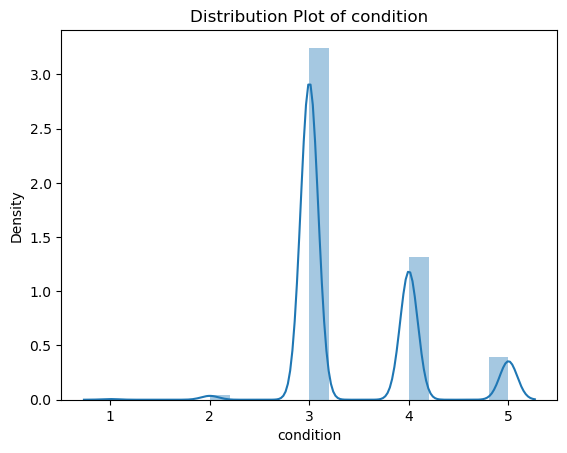

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


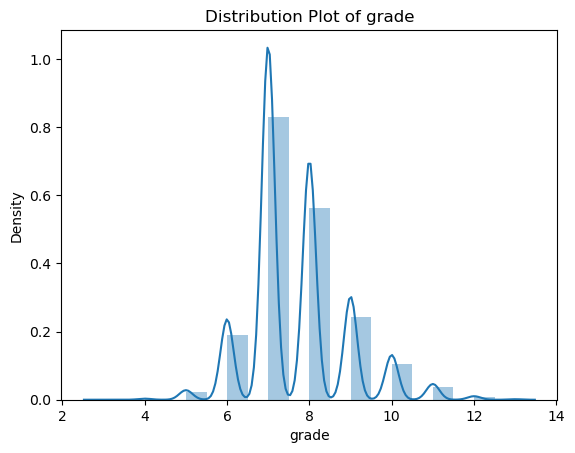

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


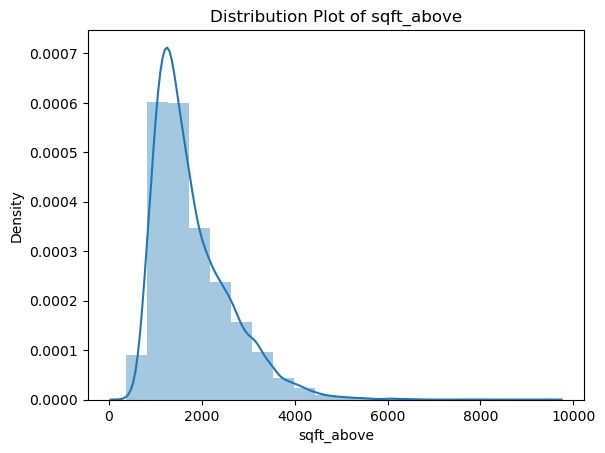

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


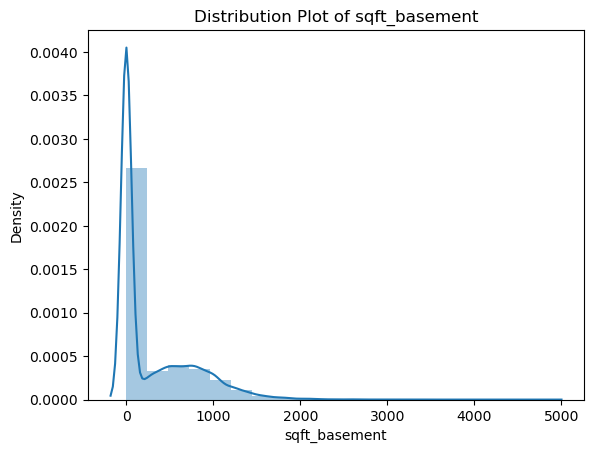

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


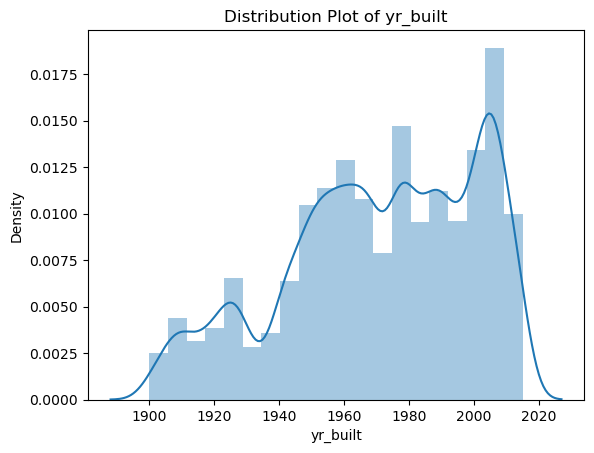

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


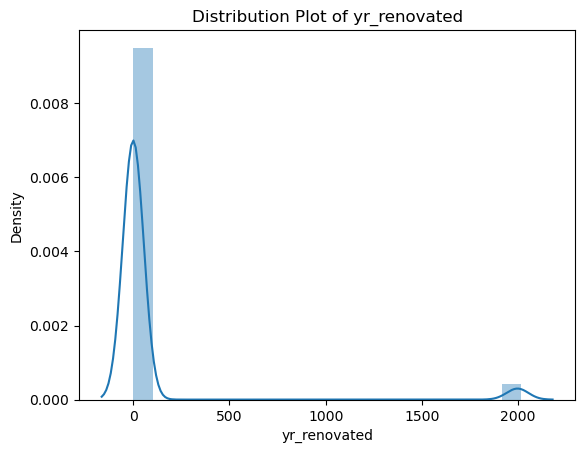

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


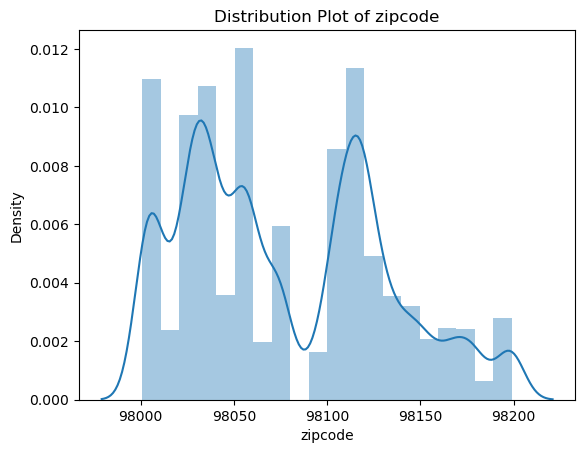

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


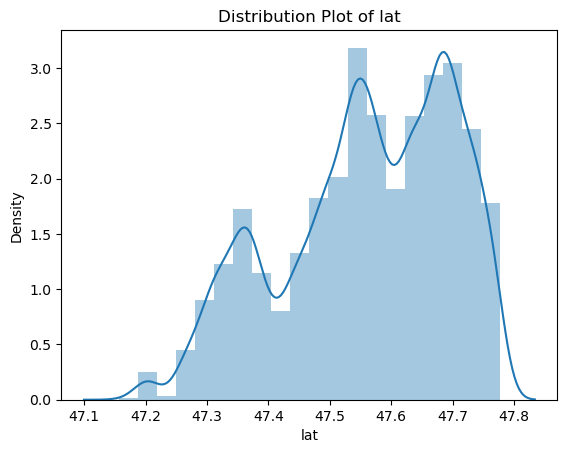

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


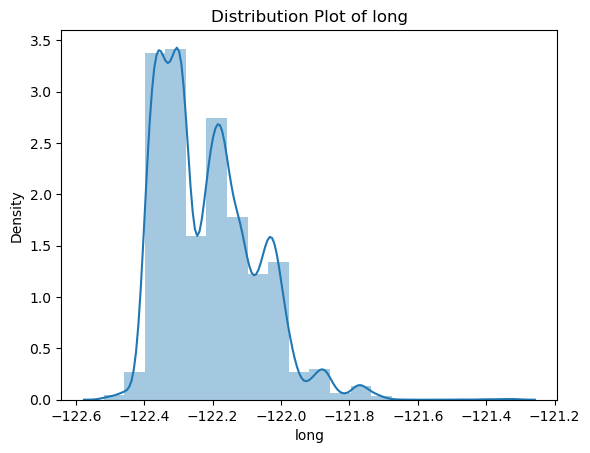

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


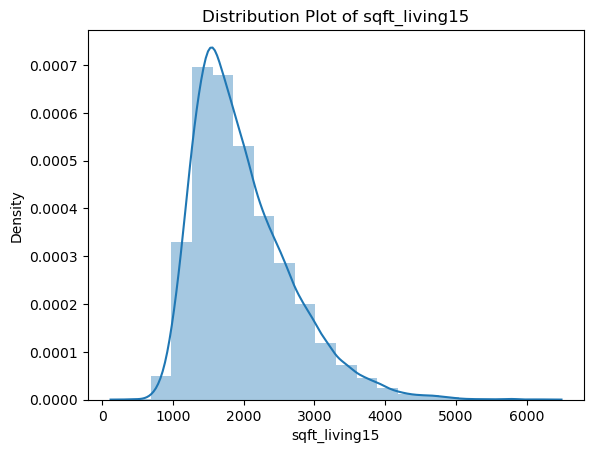

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


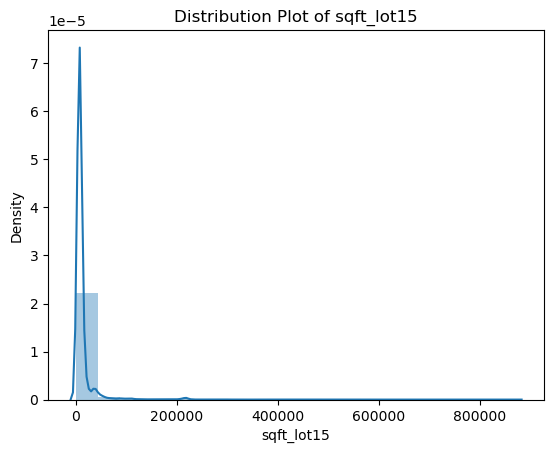

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


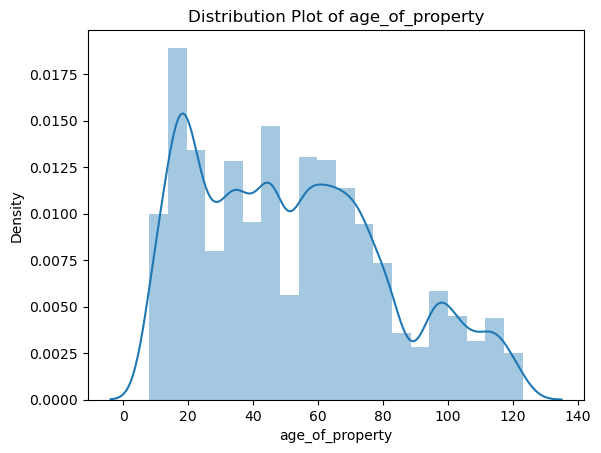

In [45]:
# Check the distribution of numerical variables using histograms
num=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_of_property']

for col in num:
    plt.figure()
    sns.distplot(df[col], bins=20, kde=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {col}')
    plt.show()

In [46]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'grade_category', 'age_of_property'],
      dtype='object')

## 6. Perform Bivariate analysis

### i. Plot pair plots

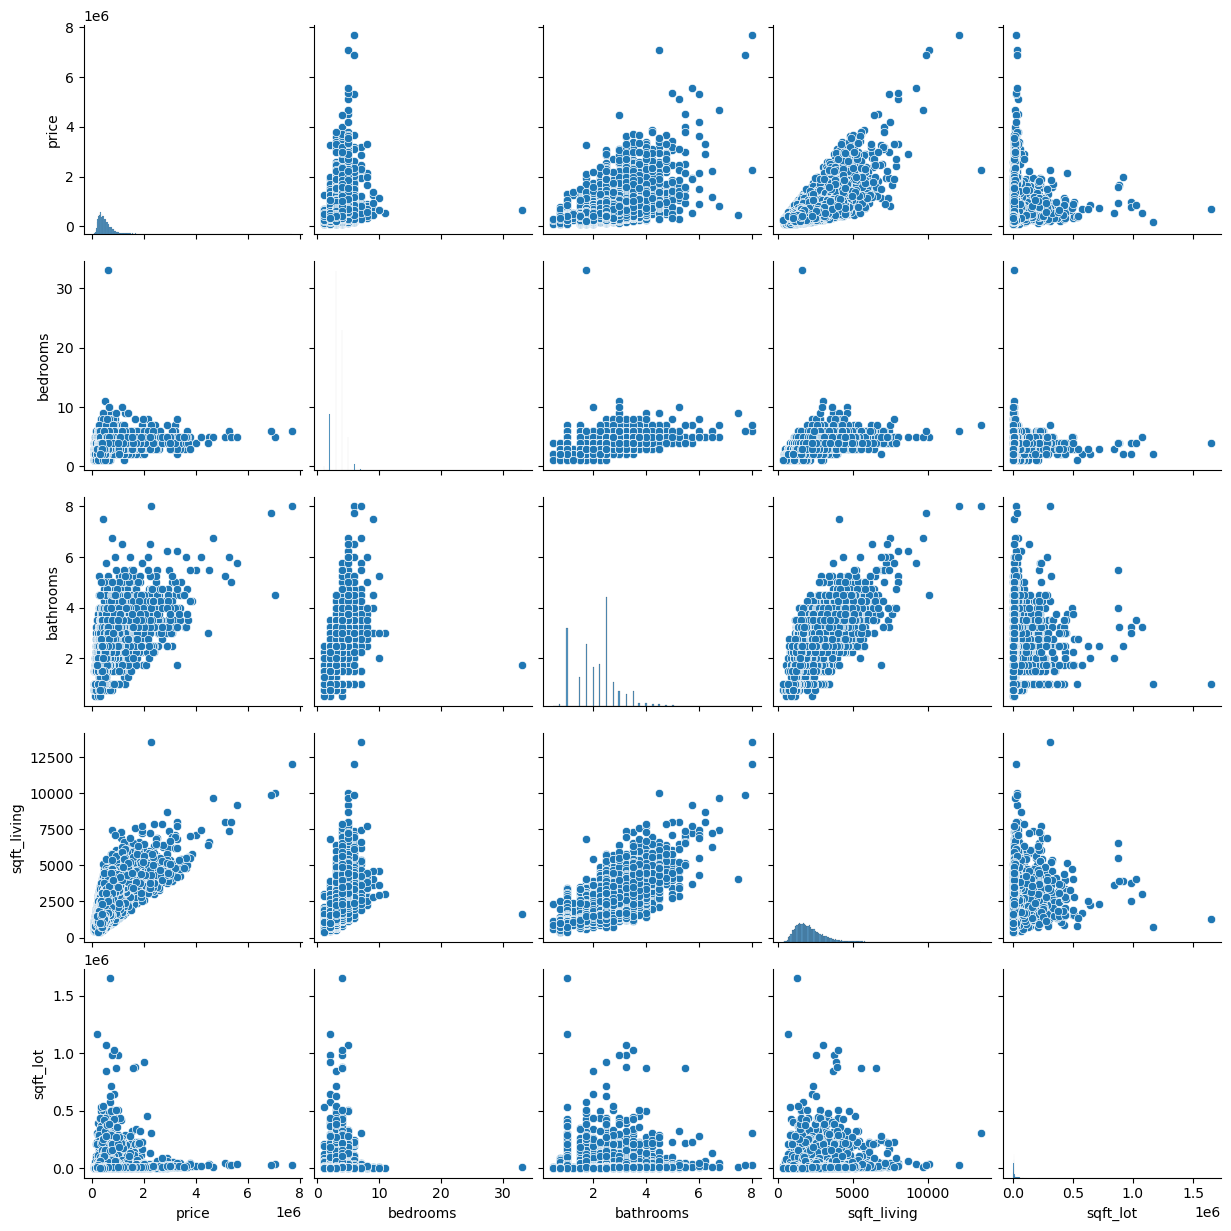

In [47]:
# Select the numerical variables for pair plot
num_var = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Create pair plots
sns.pairplot(df[num_var])
plt.show()


### ii. Perform a Chi-square analysis to check whether there is a relationship between
### ● view and waterfront
### ● condition and grade

In [48]:
from scipy.stats import chi2_contingency

# Chi-square analysis for view and waterfront
view_waterfront_table = pd.crosstab(df['view'], df['waterfront'])
chi2_view_waterfront, p_view_waterfront, _, _ = chi2_contingency(view_waterfront_table)

# Chi-square analysis for condition and grade
condition_grade_table = pd.crosstab(df['condition'], df['grade'])
chi2_condition_grade, p_condition_grade, _, _ = chi2_contingency(condition_grade_table)

# Print the chi-square statistics and p-values
print("Chi-square test for view and waterfront:")
print("Chi-square statistic:", chi2_view_waterfront)
print("p-value:", p_view_waterfront)
print("\nChi-square test for condition and grade:")
print("Chi-square statistic:", chi2_condition_grade)
print("p-value:", p_condition_grade)


Chi-square test for view and waterfront:
Chi-square statistic: 7566.88988438114
p-value: 0.0

Chi-square test for condition and grade:
Chi-square statistic: 1456.835876021546
p-value: 9.198319936194968e-280


### iii. Calculate Pearson correlation, and plot their heatmap

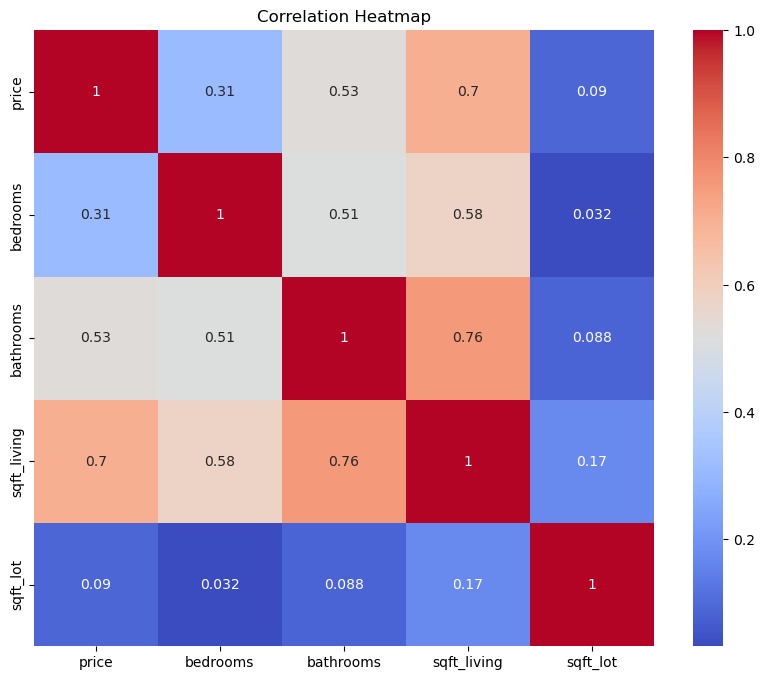

In [49]:
# Select the numerical variables for correlation analysis
numerical_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Calculate the correlation matrix
correlation_matrix = df[numerical_vars].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [50]:
num = df.select_dtypes(include=[np.number])
corr = num.corr()

In [51]:
num.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_of_property
price,1.00,0.31,0.53,0.70,0.09,0.24,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,-0.05
bedrooms,0.31,1.00,0.51,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03,-0.16
bathrooms,0.53,0.51,1.00,0.76,0.09,0.45,0.06,0.19,-0.13,0.67,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,-0.51
sqft_living,0.70,0.58,0.76,1.00,0.17,0.32,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,-0.32
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.00,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,-0.05
floors,0.24,0.18,0.45,0.32,-0.00,1.00,0.03,0.03,-0.22,0.41,0.49,-0.25,0.38,0.02,-0.02,0.06,0.09,0.24,-0.01,-0.38
waterfront,0.27,-0.01,0.06,0.10,0.02,0.03,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.03
view,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,0.05
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.22,0.02,0.05,1.00,-0.15,-0.16,0.17,-0.36,-0.06,0.00,-0.02,-0.11,-0.09,-0.00,0.36
grade,0.67,0.36,0.67,0.76,0.11,0.41,0.08,0.25,-0.15,1.00,0.76,0.17,0.45,0.01,-0.19,0.11,0.20,0.71,0.12,-0.45


<AxesSubplot:>

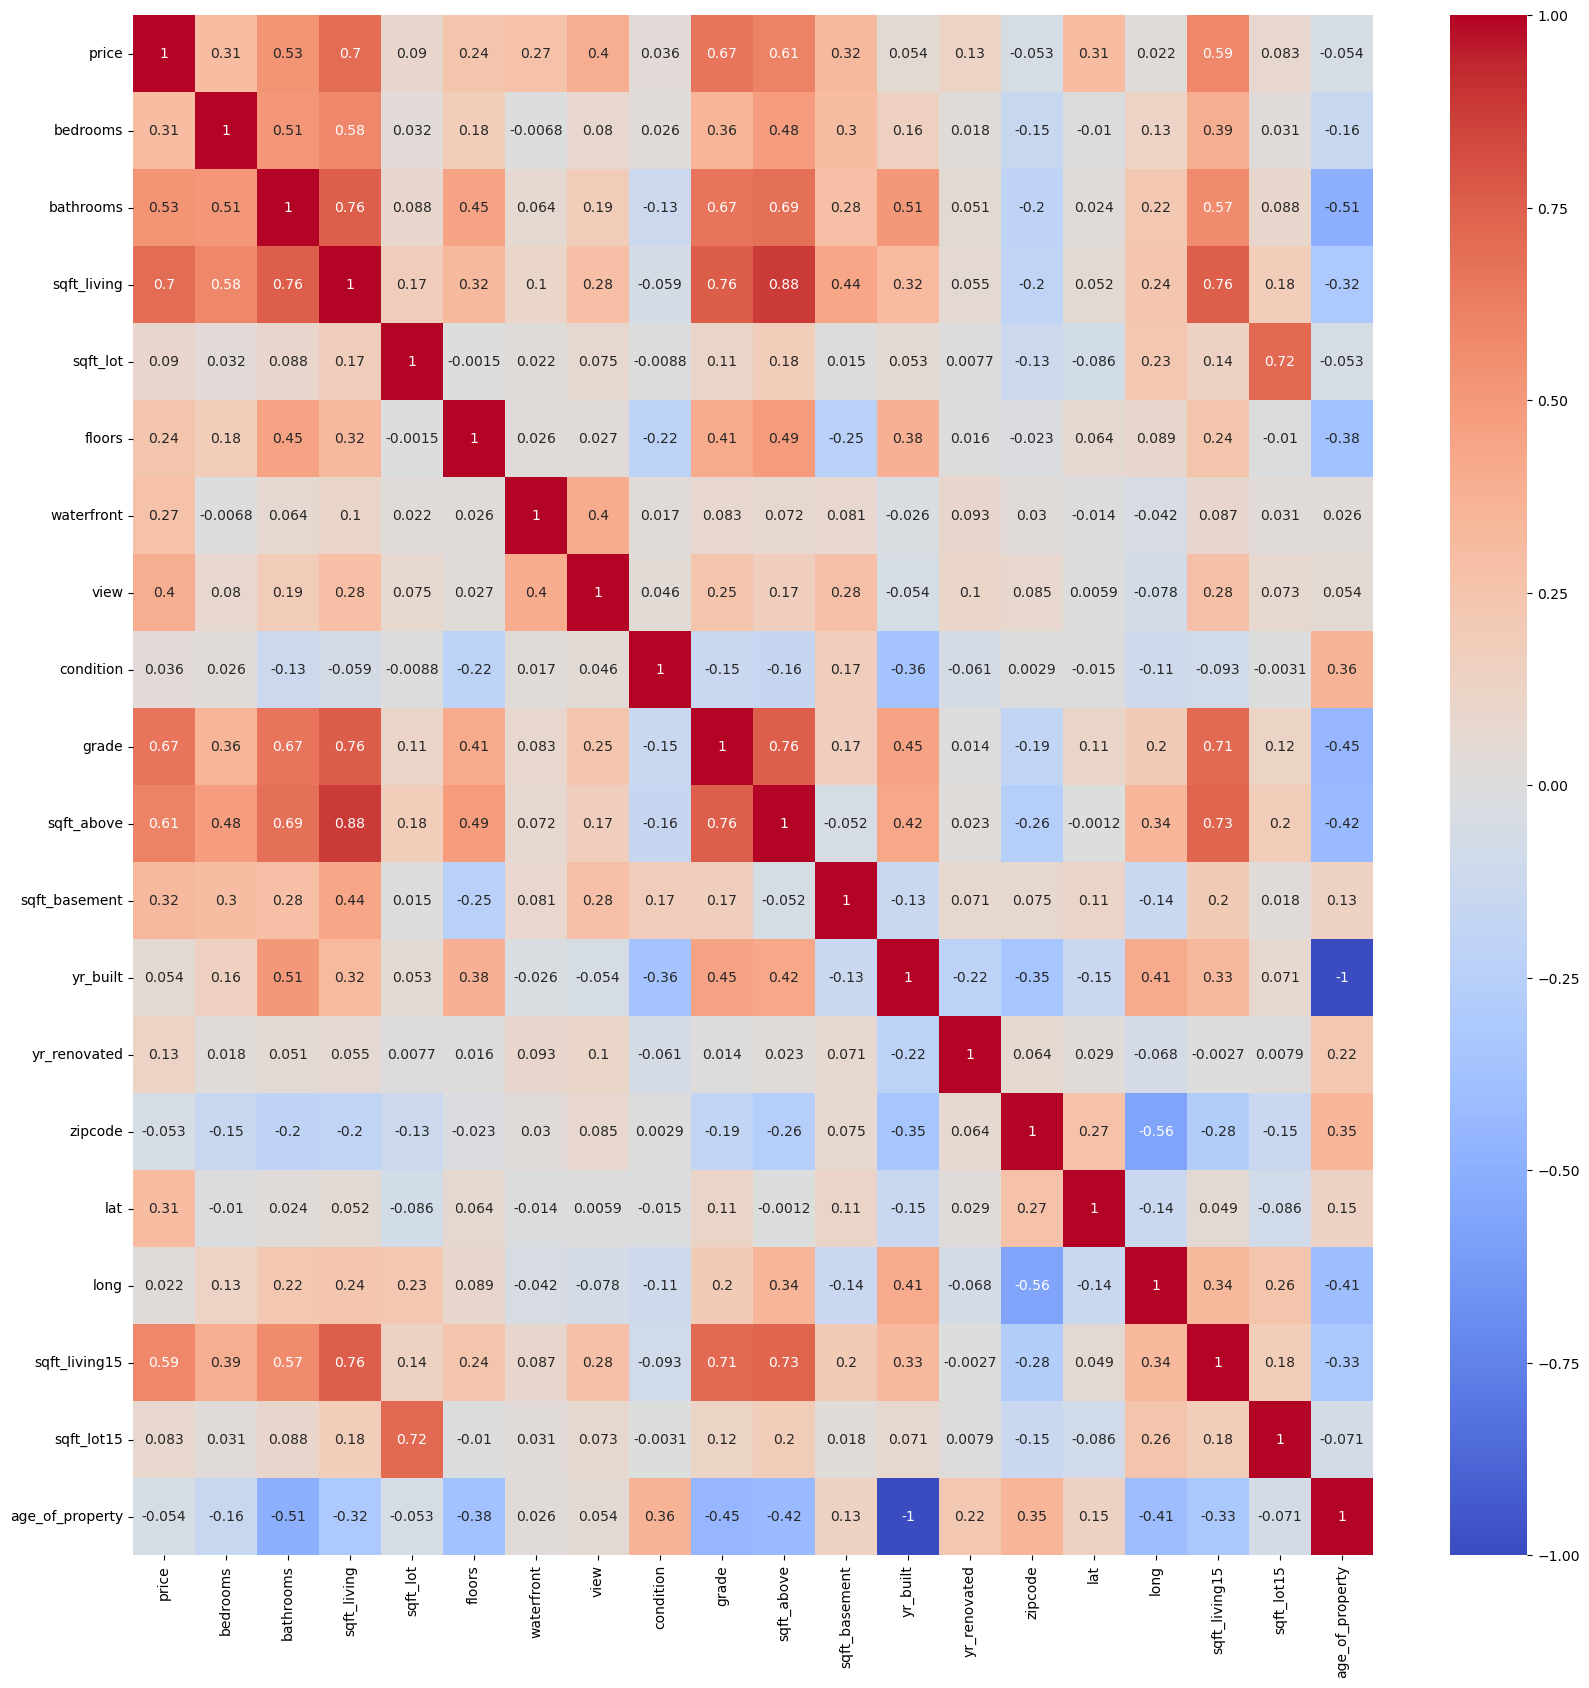

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(num.corr(),annot= True,cmap='coolwarm')

In [53]:
df[[ 'sqft_living', "sqft_above"]].corr()

,sqft_living,sqft_above
sqft_living,1.00,0.88
sqft_above,0.88,1.00


In [54]:

df[['sqft_living', 'grade']].corr()

,sqft_living,grade
sqft_living,1.00,0.76
grade,0.76,1.00


In [55]:
df[['sqft_living',  'sqft_living15']].corr()

,sqft_living,sqft_living15
sqft_living,1.00,0.76
sqft_living15,0.76,1.00


In [56]:
df[['sqft_living', 'bathrooms']].corr()


,sqft_living,bathrooms
sqft_living,1.00,0.76
bathrooms,0.76,1.00


In [57]:
# Find highly negative correlated columns
corr_= num.corr()
corr_[corr_< -0.8].stack().drop_duplicates()


yr_built  age_of_property   -1.00
dtype: float64

## 7. Drop unnecessary columns

In [58]:
df.drop([ 'date','zipcode',"age_of_property","grade" ], axis=1, inplace=True)

In [59]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,grade_category
0,221900.00,3,1.00,1180,5650,1,0,0,3,1180,0,1955,0,47.51,-122.26,1340,5650,High Quality Level of Construction and Design
1,538000.00,3,2.25,2570,7242,2,0,0,3,2170,400,1951,1991,47.72,-122.32,1690,7639,High Quality Level of Construction and Design
2,180000.00,2,1.00,770,10000,1,0,0,3,770,0,1933,0,47.74,-122.23,2720,8062,Average Level of Construction and Design
3,604000.00,4,3.00,1960,5000,1,0,0,5,1050,910,1965,0,47.52,-122.39,1360,5000,High Quality Level of Construction and Design
4,510000.00,3,2.00,1680,8080,1,0,0,3,1680,0,1987,0,47.62,-122.05,1800,7503,High Quality Level of Construction and Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3,0,0,3,1530,0,2009,0,47.70,-122.35,1530,1509,High Quality Level of Construction and Design
21593,400000.00,4,2.50,2310,5813,2,0,0,3,2310,0,2014,0,47.51,-122.36,1830,7200,High Quality Level of Construction and Design
21594,402101.00,2,0.75,1020,1350,2,0,0,3,1020,0,2009,0,47.59,-122.30,1020,2007,High Quality Level of Construction and Design
21595,400000.00,3,2.50,1600,2388,2,0,0,3,1600,0,2004,0,47.53,-122.07,1410,1287,High Quality Level of Construction and Design


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Separate the features (X) and the target variable (y)
X = df.drop('price', axis=1)
y = df['price']

### 8. One hot encode categorical variables (if any)

In [62]:
# one-hot encoding on the 'grade_category' column
X_encoded = pd.get_dummies(X['grade_category'], drop_first=True)
X = pd.concat([X.drop('grade_category', axis=1), X_encoded], axis=1)

In [63]:
X 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Average Level of Construction and Design,High Quality Level of Construction and Design
0,3,1.00,1180,5650,1,0,0,3,1180,0,1955,0,47.51,-122.26,1340,5650,0,1
1,3,2.25,2570,7242,2,0,0,3,2170,400,1951,1991,47.72,-122.32,1690,7639,0,1
2,2,1.00,770,10000,1,0,0,3,770,0,1933,0,47.74,-122.23,2720,8062,1,0
3,4,3.00,1960,5000,1,0,0,5,1050,910,1965,0,47.52,-122.39,1360,5000,0,1
4,3,2.00,1680,8080,1,0,0,3,1680,0,1987,0,47.62,-122.05,1800,7503,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3,0,0,3,1530,0,2009,0,47.70,-122.35,1530,1509,0,1
21593,4,2.50,2310,5813,2,0,0,3,2310,0,2014,0,47.51,-122.36,1830,7200,0,1
21594,2,0.75,1020,1350,2,0,0,3,1020,0,2009,0,47.59,-122.30,1020,2007,0,1
21595,3,2.50,1600,2388,2,0,0,3,1600,0,2004,0,47.53,-122.07,1410,1287,0,1


### 9. Split into train and test set

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 10. Scale the variables

In [65]:
# Scale the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 11. Train multiple models like Linear regression, Decision Tree, Random Forest, SVR, etc.

In [66]:
# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('SVR', SVR())
]

In [67]:
model_performance = {}

# Iterate over the models and evaluate their performance
for name, model in models:
    # Train the model using the scaled training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate the R-squared score and RMSE
    test_score = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Store the performance metrics in the dictionary
    model_performance[name] = {'R2-Score': test_score, 'RMSE': rmse}

In [68]:

# Print the performance metrics
for name, metrics in model_performance.items():
    print(f"{name}:")
    print(f"  R2-Score: {metrics['R2-Score']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print("___________________")

Linear Regression:
  R2-Score: 0.6807
  RMSE: 203796.0159
___________________
Decision Tree:
  R2-Score: 0.7043
  RMSE: 196142.2947
___________________
Random Forest:
  R2-Score: 0.8710
  RMSE: 129540.4012
___________________
SVR:
  R2-Score: -0.0534
  RMSE: 370186.7632
___________________


### 12. Check their performance, and comment on which is the best model


In [69]:
# Find the best model based on R2-Score and RMSE
best_model = max(model_performance, key=lambda x: model_performance[x]['R2-Score'])
print(f"The best model is {best_model}.")

The best model is Random Forest.


<div style="background-color: black; padding: 10px;">
<span style="font-size: 20px; font-weight: bold; color: white;">The best model is Random Forest!</span>
</div>


### 13. Check whether Linear regression performance is good or not


In [70]:
linear_regression_metrics = model_performance['Linear Regression']
print("Linear Regression Performance:")
print(f"  R2-Score: {linear_regression_metrics['R2-Score']:.4f}")
print(f"  RMSE: {linear_regression_metrics['RMSE']:.4f}")

Linear Regression Performance:
  R2-Score: 0.6807
  RMSE: 203796.0159


<div style="background-color: black; padding: 10px;">
<span style="font-size: 20px; font-weight: bold; color: white;">Linear Regression performance is not good!</span>
</div>



### 14. Check for Multi-collinearity (Hint: Use VIF)


In [71]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the target variable from X
X = df.drop('price', axis=1)

In [72]:
# Exclude non-numeric columns from the feature set
num_cols = X.select_dtypes(include=np.number).columns
X_num = X[num_cols]

In [73]:
# Calculate VIF for each numeric feature
vif = pd.DataFrame()
vif["Feature"] = X_num.columns
vif["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [74]:
# VIF values
print(vif)

          Feature       VIF
0        bedrooms     22.97
1       bathrooms     28.14
2     sqft_living       inf
3        sqft_lot      2.36
4          floors     14.28
5      waterfront      1.21
6            view      1.54
7       condition     34.66
8      sqft_above       inf
9   sqft_basement       inf
10       yr_built   8116.39
11   yr_renovated      1.19
12            lat 118603.77
13           long 130825.59
14  sqft_living15     24.97
15     sqft_lot15      2.57


### 15. Remove columns with high multi-collinearity (If any)


In [75]:

# Identify the features with high VIF values
high_vif_features = vif[vif["VIF"] > 10]["Feature"]

In [76]:
# Remove the columns with high multicollinearity
X_filtered = X.drop(high_vif_features, axis=1)

In [77]:
high_vif_features

0          bedrooms
1         bathrooms
2       sqft_living
4            floors
7         condition
8        sqft_above
9     sqft_basement
10         yr_built
12              lat
13             long
14    sqft_living15
Name: Feature, dtype: object

# 16. Re-run all the models and check the performance

In [108]:
X_filtered['price']=df.price

In [109]:
X_filtered

,sqft_lot,waterfront,view,yr_renovated,sqft_lot15,grade_category,price
0,5650,0,0,0,5650,High Quality Level of Construction and Design,221900.00
1,7242,0,0,1991,7639,High Quality Level of Construction and Design,538000.00
2,10000,0,0,0,8062,Average Level of Construction and Design,180000.00
3,5000,0,0,0,5000,High Quality Level of Construction and Design,604000.00
4,8080,0,0,0,7503,High Quality Level of Construction and Design,510000.00
...,...,...,...,...,...,...,...
21592,1131,0,0,0,1509,High Quality Level of Construction and Design,360000.00
21593,5813,0,0,0,7200,High Quality Level of Construction and Design,400000.00
21594,1350,0,0,0,2007,High Quality Level of Construction and Design,402101.00
21595,2388,0,0,0,1287,High Quality Level of Construction and Design,400000.00


### 16. Re-run all the models and check the performance

In [110]:
X_filtered=pd.get_dummies(X_filtered,columns=['grade_category'],drop_first=True) # one hot encoding

In [112]:
num1=['sqft_lot', 'waterfront', 'view', 'yr_renovated', 'sqft_lot15',
       'grade_category_Average Level of Construction and Design',
       'grade_category_High Quality Level of Construction and Design']

In [113]:
X_filtered[num1]=sc.fit_transform(X_filtered[num1]) #scalling 

In [114]:
X_filtered

,sqft_lot,waterfront,view,yr_renovated,sqft_lot15,price,grade_category_Average Level of Construction and Design,grade_category_High Quality Level of Construction and Design
0,-0.23,-0.09,-0.31,-0.21,-0.26,221900.00,-0.35,0.47
1,-0.19,-0.09,-0.31,4.74,-0.19,538000.00,-0.35,0.47
2,-0.12,-0.09,-0.31,-0.21,-0.17,180000.00,2.89,-2.12
3,-0.24,-0.09,-0.31,-0.21,-0.28,604000.00,-0.35,0.47
4,-0.17,-0.09,-0.31,-0.21,-0.19,510000.00,-0.35,0.47
...,...,...,...,...,...,...,...,...
21592,-0.34,-0.09,-0.31,-0.21,-0.41,360000.00,-0.35,0.47
21593,-0.22,-0.09,-0.31,-0.21,-0.20,400000.00,-0.35,0.47
21594,-0.33,-0.09,-0.31,-0.21,-0.39,402101.00,-0.35,0.47
21595,-0.31,-0.09,-0.31,-0.21,-0.42,400000.00,-0.35,0.47


In [115]:
X_VIF=X_filtered.drop('price',axis=1)

In [116]:
y_VIF=X_filtered.price

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_VIF, y_VIF, test_size=0.4, random_state=42)

In [119]:
model_performance = {}

# Iterate over the models and evaluate their performance
for name, model in models:
    # Train the model using the scaled training data
    model.fit(X_train,y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the R-squared score and RMSE
    test_score = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Store the performance metrics in the dictionary
    model_performance[name] = {'R2-Score': test_score, 'RMSE': rmse}

In [120]:
for name, metrics in model_performance.items():
    print(f"{name}:")
    print(f"  R2-Score: {metrics['R2-Score']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print("___________________")

Linear Regression:
  R2-Score: 0.4143
  RMSE: 286615.7797
___________________
Decision Tree:
  R2-Score: 0.0828
  RMSE: 358673.1038
___________________
Random Forest:
  R2-Score: 0.4022
  RMSE: 289563.7823
___________________
SVR:
  R2-Score: -0.0550
  RMSE: 384686.3095
___________________


## Compulsory
### Use grid search CV to tune the hyperparameter of the best model
### Train a polynomial regression model with degree 2, and 3 and compare its performance with other models 


In [79]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,grade_category
0,221900.00,3,1.00,1180,5650,1,0,0,3,1180,0,1955,0,47.51,-122.26,1340,5650,High Quality Level of Construction and Design
1,538000.00,3,2.25,2570,7242,2,0,0,3,2170,400,1951,1991,47.72,-122.32,1690,7639,High Quality Level of Construction and Design
2,180000.00,2,1.00,770,10000,1,0,0,3,770,0,1933,0,47.74,-122.23,2720,8062,Average Level of Construction and Design
3,604000.00,4,3.00,1960,5000,1,0,0,5,1050,910,1965,0,47.52,-122.39,1360,5000,High Quality Level of Construction and Design
4,510000.00,3,2.00,1680,8080,1,0,0,3,1680,0,1987,0,47.62,-122.05,1800,7503,High Quality Level of Construction and Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3,0,0,3,1530,0,2009,0,47.70,-122.35,1530,1509,High Quality Level of Construction and Design
21593,400000.00,4,2.50,2310,5813,2,0,0,3,2310,0,2014,0,47.51,-122.36,1830,7200,High Quality Level of Construction and Design
21594,402101.00,2,0.75,1020,1350,2,0,0,3,1020,0,2009,0,47.59,-122.30,1020,2007,High Quality Level of Construction and Design
21595,400000.00,3,2.50,1600,2388,2,0,0,3,1600,0,2004,0,47.53,-122.07,1410,1287,High Quality Level of Construction and Design


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [83]:
df_new=pd.get_dummies(df,columns=['grade_category'],drop_first=True)

In [84]:
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,grade_category_Average Level of Construction and Design,grade_category_High Quality Level of Construction and Design
0,221900.00,3,1.00,1180,5650,1,0,0,3,1180,0,1955,0,47.51,-122.26,1340,5650,0,1
1,538000.00,3,2.25,2570,7242,2,0,0,3,2170,400,1951,1991,47.72,-122.32,1690,7639,0,1
2,180000.00,2,1.00,770,10000,1,0,0,3,770,0,1933,0,47.74,-122.23,2720,8062,1,0
3,604000.00,4,3.00,1960,5000,1,0,0,5,1050,910,1965,0,47.52,-122.39,1360,5000,0,1
4,510000.00,3,2.00,1680,8080,1,0,0,3,1680,0,1987,0,47.62,-122.05,1800,7503,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3,0,0,3,1530,0,2009,0,47.70,-122.35,1530,1509,0,1
21593,400000.00,4,2.50,2310,5813,2,0,0,3,2310,0,2014,0,47.51,-122.36,1830,7200,0,1
21594,402101.00,2,0.75,1020,1350,2,0,0,3,1020,0,2009,0,47.59,-122.30,1020,2007,0,1
21595,400000.00,3,2.50,1600,2388,2,0,0,3,1600,0,2004,0,47.53,-122.07,1410,1287,0,1


In [86]:
num_new=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'grade_category_Average Level of Construction and Design',
       'grade_category_High Quality Level of Construction and Design']

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
sc=StandardScaler()

In [89]:
df_new[num_new]=sc.fit_transform(df_new[num_new])

In [90]:
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,grade_category_Average Level of Construction and Design,grade_category_High Quality Level of Construction and Design
0,221900.00,-0.40,-1.45,-0.98,-0.23,-0.96,-0.09,-0.31,-0.63,-0.74,-0.66,-0.54,-0.21,-0.35,-0.31,-0.94,-0.26,-0.35,0.47
1,538000.00,-0.40,0.17,0.53,-0.19,0.84,-0.09,-0.31,-0.63,0.46,0.24,-0.68,4.74,1.16,-0.75,-0.43,-0.19,-0.35,0.47
2,180000.00,-1.48,-1.45,-1.43,-0.12,-0.96,-0.09,-0.31,-0.63,-1.23,-0.66,-1.29,-0.21,1.28,-0.14,1.07,-0.17,2.89,-2.12
3,604000.00,0.68,1.15,-0.13,-0.24,-0.96,-0.09,-0.31,2.44,-0.89,1.40,-0.20,-0.21,-0.28,-1.27,-0.91,-0.28,-0.35,0.47
4,510000.00,-0.40,-0.15,-0.44,-0.17,-0.96,-0.09,-0.31,-0.63,-0.13,-0.66,0.54,-0.21,0.41,1.20,-0.27,-0.19,-0.35,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,-0.40,0.50,-0.60,-0.34,2.64,-0.09,-0.31,-0.63,-0.31,-0.66,1.29,-0.21,1.00,-0.94,-0.67,-0.41,-0.35,0.47
21593,400000.00,0.68,0.50,0.25,-0.22,0.84,-0.09,-0.31,-0.63,0.63,-0.66,1.46,-0.21,-0.36,-1.05,-0.23,-0.20,-0.35,0.47
21594,402101.00,-1.48,-1.78,-1.15,-0.33,0.84,-0.09,-0.31,-0.63,-0.93,-0.66,1.29,-0.21,0.25,-0.60,-1.41,-0.39,-0.35,0.47
21595,400000.00,-0.40,0.50,-0.52,-0.31,0.84,-0.09,-0.31,-0.63,-0.23,-0.66,1.12,-0.21,-0.18,1.03,-0.84,-0.42,-0.35,0.47


In [91]:
X=df_new.drop('price',axis=1)

In [92]:
y=df_new.price

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [94]:
model = RandomForestRegressor()

In [98]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [99]:
grid_search = GridSearchCV(model, param_grid, cv=5)

In [101]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [104]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
print("Linear Regression:")
print("MSE:", linear_reg_mse)
print("R2 Score:", linear_reg_r2)
print()

Linear Regression:
MSE: 46006324439.45891
R2 Score: 0.6720072590053732



In [105]:
poly_reg2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg2.fit(X_train, y_train)
poly_reg2_pred = poly_reg2.predict(X_test)
poly_reg2_mse = mean_squared_error(y_test, poly_reg2_pred)
poly_reg2_r2 = r2_score(y_test, poly_reg2_pred)
print("Polynomial Regression (Degree 2):")
print("MSE:", poly_reg2_mse)
print("R2 Score:", poly_reg2_r2)
print()

Polynomial Regression (Degree 2):
MSE: 29888549258.824467
R2 Score: 0.7869156618096037



In [107]:
poly_reg3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_reg3.fit(X_train, y_train)
poly_reg3_pred = poly_reg3.predict(X_test)
poly_reg3_mse = mean_squared_error(y_test, poly_reg3_pred)
poly_reg3_r2 = r2_score(y_test, poly_reg3_pred)
print("Polynomial Regression (Degree 3):")
print("MSE:", poly_reg3_mse)
print("R2 Score:", poly_reg3_r2)
print()









Polynomial Regression (Degree 3):
MSE: 8.76672289925631e+26
R2 Score: -6250056939565539.0



Linear Regression:
  R2-Score: 0.6807
  RMSE: 203796.0159
___________________
Decision Tree:
  R2-Score: 0.7043
  RMSE: 196142.2947
___________________
Random Forest:
  R2-Score: 0.8710
  RMSE: 129540.4012
    
Polynomial Regression (Degree 2):
MSE: 29888549258.824467
R2 Score: 0.7869156618096037
    
    
Polynomial Regression (Degree 3):
MSE: 8.76672289925631e+26
R2 Score: -6250056939565539.0
    

# Here is the comparision of the all model from this we can conclude that Random Forest regression model giving us a best accurancy